# COMP4318 & 5318 - Machine Learning and Data Mining: Assignment 1

Due: Sunday Week 7 - Sep 15th, 2024 11:59PM

# 1. Summary

In this assignment, you are tasked with the challenge of developing machine learning (ML) classifiers capable of categorizing grayscale images into predefined classes. Your task involves employing various classification algorithms to identify which is most effective and efficient in processing image data. Additionally, you are required to document your methodologies and findings in a detailed report. The total score for this assignment is allocated as follows:

1. Code: max 65 points
2. Report: max 35 points

Detailed about assignment specifcations and scoring criteria can be found in the assignment page on Canvas (Assignments $\rightarrow$ Assignment 1 - Specification). The sections below provide comprehensive information on the assignment tasks and guidelines for submission.

# 2. Dataset description


The dataset for this assignment is derived from the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a collection of fashion articles represented as grayscale images. This dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. Your prediction over the test set must be submitted to Kaggle to receive the public accuracy over first 2,000 examples, you will use this accuracy to analyse the performance of your proposed method. It is NOT allowed to use any examples from the test set for training; or it will be considered as cheating. The rest 3,000 labels of the test set are reserved for marking purpose.

Data samples are categorized into the following ten classes:

- 0: T-shirt/Top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


Below are visual examples of the dataset, showcasing samples from each category:

<img src="https://www.researchgate.net/publication/346405197/figure/fig3/AS:962581560848384@1606508736352/Examples-of-Fashion-MNIST-dataset.ppm" alt="DataSet" title="DataSet" width=500/>

The dataset can be downloaded from the Assignment 1 page on Canvas. Note that only a subset of the original Fashion-MNIST dataset is provided for this assignment. You must use the specific files supplied in the assignment materials for training and testing.

# 3. Data Preparation

The required `data` files are in the data folder, downloadable as a zip from the Assignment 1 - Specification page on Canvas. Extract the files into your working directory. The folder includes:

- `train.csv`: 30,000 labeled samples for training, evaluation, and model selection.
- `test1.csv`: 2,000 labeled samples for model efficiency testing (Canvas submission).
- `test2.csv`: 5,000 unlabeled samples for Kaggle evaluation.
- `sample.csv`: A sample prediction file format for Kaggle submission (`test_output.csv`).

Use Python's pandas library to load these CSV files into DataFrames, ensuring they are under the `./data/` directory.

## 3.1 Loading data

Use the following Python code to load the training data:  

In [13]:
import pandas as pd
import os
print(os.listdir("./data"))
pd.set_option('display.max_columns', 10)

['.DS_Store', 'sample.csv', 'test2.csv', 'test1.csv', 'train.csv']


In [14]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./data/train.csv') 

In [15]:
# print out the first 5 rows of the training dataframe
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,1,0,0,0,0,...,0,0,0,0,6
1,2,0,0,0,0,...,0,0,0,0,7
2,3,0,0,0,0,...,0,0,0,0,4
3,4,0,0,0,0,...,0,0,0,0,7
4,5,0,0,0,0,...,0,0,0,0,3


Then data would be a dataframe with 30,000 samples including 784 features (from v1 to v784) and its label.

In [17]:
# Selecting input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

# Selecting output lable 
data_train_label = data_train_df.label.to_numpy()

Showing a sample data. The first example belongs to class 2: Pullover

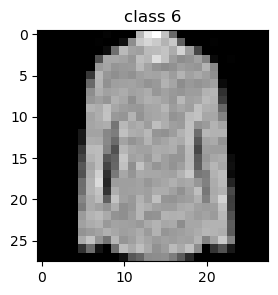

In [19]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.figure(figsize=(3,3))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]))
plt.show()

# 4. Task Description

## 4.1 Code

You will now explore and build diffferent ML models for the given dataset. You are required to implement at least **FOUR** models, which should include THREE from the following methods:

1. Nearest Neighbor
2. Logistic Regression
3. Naïve Bayes 
4. Decision Tree
5. SVM

and ONE of these ensemble methods:
    
 1. Bagging
 2. Boosting
 3. Random forest
    

For these implementations, you may use established packages and libraries that have been introduced in the tutorials such as sklearn or create your own custom solutions from scratch.

Your code must be easily readable and well commented. The following are expected to be satisfied:

- **Readability & Consistency**: Easy to read, and consistent in style
  
- **Coding Descriptions & Comments**: Descriptions and comments clarify meaning where needed
  
- **Robustness**: Handles erroneous or unexpected input 

It should follow the structure below.

### 4.1.1 Environment Setup

Install and import necessary packages and libraries used in your coding environment. It is recommended to specify their versions to ensure reproducibility.

In [26]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

Define any necessary utility or helper functions (e.g., for plotting, optimization, etc.) if applicable.

In [28]:
# plot the bar figure
def plot_model_metric(ax, models, data, data_name):

    # Convert array of data into dataframe for easier plotting
    data_dict = {'Model': models, data_name: data}
    df = pd.DataFrame(data_dict)

    # set the style of visualization
    sns.set(style="whitegrid")

    sns.barplot(x='Model', y = data_name, hue = df.Model, data = df, palette = "Blues_d", ax = ax, dodge = False, width = 0.5)

    # Set figure title and labels
    ax.set_title('Model {} Comparison'.format(data_name), fontsize = 16)
    ax.set_xlabel(None)
    ax.set_ylabel(data_name, fontsize = 12)
    
    # Loop through data and add annotations
    for i, val in enumerate(df[data_name]):
        ax.text(i, val, f"{val:.2f}", ha = 'center', va = 'bottom', fontsize = 10) # adjust offset and alignment

In [29]:
def plot_heatmap(ax, y_true, y_pred_dict, title=""):
    cr_dict = {
        # get classification report for each model
        model: classification_report(y_true, y_pred, output_dict=True)['weighted avg'] for model, y_pred in y_pred_dict.items()
    }

    # combined reports
    cr_combined = pd.DataFrame(cr_dict).T
    print(f'Classification Report – {title}')
    print(cr_combined)
    print()
    
    sns.heatmap(cr_combined[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt='.2f', linewidth=.7, ax=ax)
    ax.set_title(f'Classification Report Metrics – {title}')

### 4.1.2 Data Preprocessing

Implement at least ONE preprocessing technique on the dataset before model training. Possible methods include **Normalization**, **Dimensionality Reduction**, etc.

In [32]:
# Load the data
data_train_df = pd.read_csv('./data/train.csv')

# Feature and label selection
X = data_train_df.loc[:, "v1":"v784"].to_numpy()
y = data_train_df['label'].to_numpy()

# Split training data for validation 
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### 4.1.3 Model 1: SVM

#### Implementation

Implement the initial version of your model using a set of predefined hyperparameters. This will establish a baseline from which improvements can be made.

In [36]:
# Initialize SVM classifier
svm = SVC(kernel = 'rbf', random_state = 42)

# Get the accuracy of the inital model
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
print(f"Accuracy of inital SVM Model: {accuracy_score(y_val, y_pred):.4f}")

Accuracy of inital SVM Model: 0.8777


#### Hyper-parameters Tuning

Enhance your model by fine-tuning its hyperparameters. Use techniques such as grid search combined with k-fold cross-validation to systematically identify the optimal parameter set.

In order to find the best parameters for SVM model, we plotted a graph between the validation accuracy and the penalties (C) ranging from 0.002 to 1000.
From the plot we found that the highest accuracy is achieved when C lies between 20 to 21. 

https://federicoarenasl.github.io/SVM-LR-on-Fashion-MNIST/

For kernel coefficient (gamma), value should lie between 3/k and 6/k, where k is the number of input fields. Since no. of input fields is 784, gamma lies between 0.004 to 0.006.

https://www.ibm.com/docs/sk/spss-modeler/saas?topic=node-svm-expert-options

In [40]:
# Define the parameter grid
param_grid = {
    'C': [20, 21],     # Regularization parameter
    'gamma': [0.004, 0.006]
}

# Grid search with cross-validation for fine-tune the hyperparameters
grid_search_svm = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1)
train_start = time.time()
grid_search_svm.fit(X_train, y_train)
train_end = time.time()

In [41]:
# Retrieve the best parameters and its accuracy
best_svm = grid_search_svm.best_estimator_
pred_start= time.time()
y_pred_svm = best_svm.predict(X_val)
pred_end = time.time()
accuracy_svm = accuracy_score(y_val, y_pred_svm)

# Calculate training time and inference time of model
training_svm = train_end-train_start
inference_svm = pred_end-pred_start

print("Best SVM Model")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Params: {grid_search_svm.best_params_}")
print(f"Training Time: {training_svm:.4f}")
print(f"Inference Time: {inference_svm:.4f}")

Best SVM Model
Accuracy: 0.8864
Params: {'C': 20, 'gamma': 0.006}
Training Time: 134.3865
Inference Time: 26.2052


### 4.1.4 Model 2: Decision Tree

Implement and fine-tune the hyperparameters for Model 2 (using the same approach as Model 1). 

In [44]:
# Initialize the model
tree = DecisionTreeClassifier()

# Get the accuracy of the inital model
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)
print(f"Accuracy of inital Decision Tree Model: {accuracy_score(y_val, y_pred):.4f}")

Accuracy of inital Decision Tree Model: 0.7775


The criterion to measure the quality of splitting was selected as entropy as the tutorial example in week 5. Max_depth and min_samples_split were chosen as the parameters to limit the size of the tree to avoid overfitting, and the minimum number of samples are set to split a node. 

In [46]:
# Set up grid search for hyperparameter tuning
param_grid = {
    'criterion': ['entropy'],      # Regularization parameter
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

# Perform GridSearchCV
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
train_start = time.time()
grid_search_tree.fit(X_train, y_train)
train_end = time.time()

In [47]:
# Get the best model and evaluate on the validation set
best_tree = grid_search_tree.best_estimator_
pred_start= time.time()
y_pred_tree = best_tree.predict(X_val)
pred_end = time.time()
accuracy_tree = accuracy_score(y_val, y_pred_tree)

# Calculate training time and inference time of model
training_tree = train_end - train_start
inference_tree = pred_end - pred_start

print("Best Decision Tree Model")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Params: {grid_search_tree.best_params_}")
print(f"Training Time: {training_tree:.4f}")
print(f"Inference Time: {inference_tree:.4f}")

Best Decision Tree Model
Accuracy: 0.7965
Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Training Time: 84.5945
Inference Time: 0.0042


### 4.1.5 Model 3: Logistic Regression

Implement and fine-tune the hyperparameters for Model 3. 

The max_iter parameter was set to 1000 to prevent exceeding iteration limit error during the gridsearch execution.

In [51]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
print(f"Accuracy of inital Logistic Regrssion Model: {accuracy_score(y_val, y_pred):.4f}")

Accuracy of inital Logistic Regrssion Model: 0.8469


For hyperparameter tuning of logistic regression, we have chosen 'C' which controls the strength of the regularization and for 'solver' we have chosen saga. According to scikit-learn, saga slover is faster for large datasets and it can handle multinomial loss for multiclass classification. Default range of 'C' is consider (i.e. from 0.01 to 1) in order to achieve high validation accuracy. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [53]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1],     # Regularization parameter
    'solver' : ['saga']
}

# Grid search with cross-validation
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=3, n_jobs=-1)
train_start = time.time()
grid_search_log_reg.fit(X_train, y_train)
train_end = time.time()

In [54]:
# Best parameters and accuracy
best_log_reg = grid_search_log_reg.best_estimator_
pred_start= time.time()
y_pred_log_reg = best_log_reg.predict(X_val)
pred_end = time.time()
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)

# Calculate training and inference time
training_log_reg = train_end - train_start
inference_log_reg = pred_end - pred_start

print("Best Logistic Regression Model")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Params: {grid_search_log_reg.best_params_}")
print(f"Training Time: {training_log_reg:.4f}")
print(f"Inference Time: {inference_log_reg:.4f}")

Best Logistic Regression Model
Accuracy: 0.8548
Params: {'C': 0.1, 'solver': 'saga'}
Training Time: 240.1670
Inference Time: 0.0061


### 4.1.6 Model 4: Random Forest

Implement and fine-tune the hyperparameters for Model 4. 

In [135]:
# Initialize the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(f"Accuracy of inital Random Forest Model: {accuracy_score(y_val, y_pred):.4f}")

Accuracy of inital Random Forest Model: 0.8713


The criterion was set to entropy, consistent with the decision tree model, as it is a common parameter for tree-based model.

In [59]:
# Set up grid search for hyperparameter tuning
param_grid = {
    'criterion' : ['entropy'],
    'n_estimators': [100, 150],     # Regularization parameter
    'max_depth': [10, 20]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
train_start = time.time()
grid_search_rf.fit(X_train, y_train)
train_end = time.time()

In [60]:
# Get the best model and evaluate on the validation set
best_rf = grid_search_rf.best_estimator_
pred_start= time.time()
y_pred_rf = best_rf.predict(X_val)
pred_end = time.time()
accuracy_rf = accuracy_score(y_val, y_pred_rf)

# Calculate training time and inference time of model
training_rf = train_end-train_start
inference_rf = pred_end-pred_start

print("Best Random Forest Model")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Params: {grid_search_rf.best_params_}")
print(f"Training Time: {training_rf:.4f}")
print(f"Inference Time: {inference_rf:.4f}")

Best Random Forest Model
Accuracy: 0.8744
Params: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 150}
Training Time: 3078.7115
Inference Time: 0.1049


### 4.1.7 Evaluation

Evaluate the best version of each model using appropriate classification performance metrics on the validation set and test on `test1.csv`. Ensure that the results are visualized using high-quality plots, figures, or tables to clearly demonstrate model performance.

In [63]:
data_test1_df = pd.read_csv('./data/test1.csv')

# Feature and label selection
X_test1 = data_test1_df.loc[:, "v1":"v784"].to_numpy()
y_test1 = data_test1_df['label'].to_numpy()

X_test1 = scaler.fit_transform(X_test1)

In [64]:
# Evaluate each model
models = ['SVM', 'Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [accuracy_svm, accuracy_tree, accuracy_log_reg, accuracy_rf]
training_time = [training_svm, training_tree, training_log_reg, training_rf]
inference_time = [inference_svm, inference_tree, inference_log_reg, inference_rf]
testset_accur = [
    accuracy_score(y_test1, best_svm.predict(X_test1)),
    accuracy_score(y_test1, best_tree.predict(X_test1)),
    accuracy_score(y_test1, best_log_reg.predict(X_test1)),
    accuracy_score(y_test1, best_rf.predict(X_test1)),
]

Classification Report – Validation Set
                     precision    recall  f1-score  support
SVM                   0.885942  0.886400  0.885982   7500.0
Decision Tree         0.799005  0.796533  0.797036   7500.0
Logistic Regression   0.854167  0.854800  0.854346   7500.0
Random Forest         0.873444  0.874400  0.873056   7500.0

Classification Report – test1.csv
                     precision  recall  f1-score  support
SVM                   0.889751  0.8900  0.889246   2000.0
Decision Tree         0.807752  0.8060  0.806143   2000.0
Logistic Regression   0.855677  0.8560  0.855232   2000.0
Random Forest         0.879829  0.8805  0.878323   2000.0



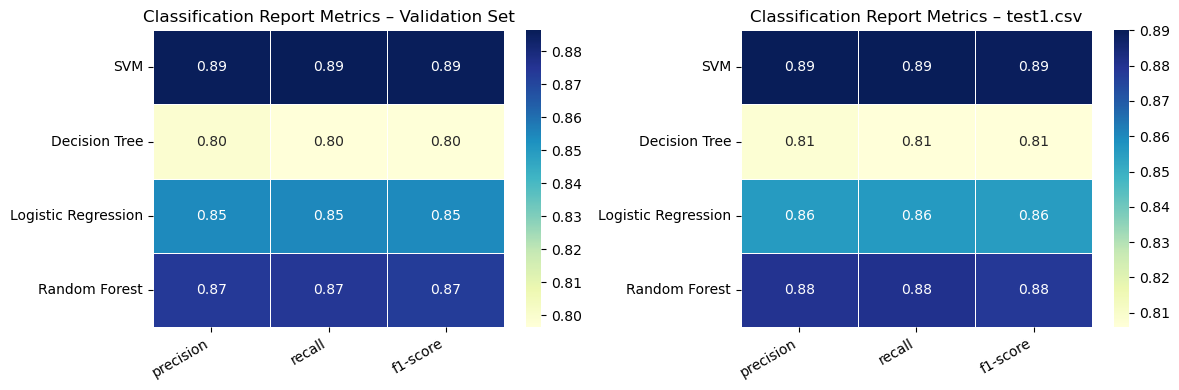

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
fig.autofmt_xdate()

# validation set predictions
val_predictions = {
    'SVM': y_pred_svm,
    'Decision Tree': y_pred_tree,
    'Logistic Regression': y_pred_log_reg,
    'Random Forest': y_pred_rf
}

# test set predictions
test_predictions = {
    'SVM': best_svm.predict(X_test1),
    'Decision Tree': best_tree.predict(X_test1),
    'Logistic Regression': best_log_reg.predict(X_test1),
    'Random Forest': best_rf.predict(X_test1)
}

plot_heatmap(axes[0], y_val, val_predictions, "Validation Set")
plot_heatmap(axes[1], y_test1, test_predictions, "test1.csv")
plt.tight_layout()
plt.show()

### 4.1.8 Comparison

Compare all classifiers with their optimized hyper-parameters, focusing on criteria such as classification performance, training time, and inference time. Visualization of these comparisons is required; use high-quality plots, figures, or tables to facilitate a clear understanding of the differences and strengths of each model.

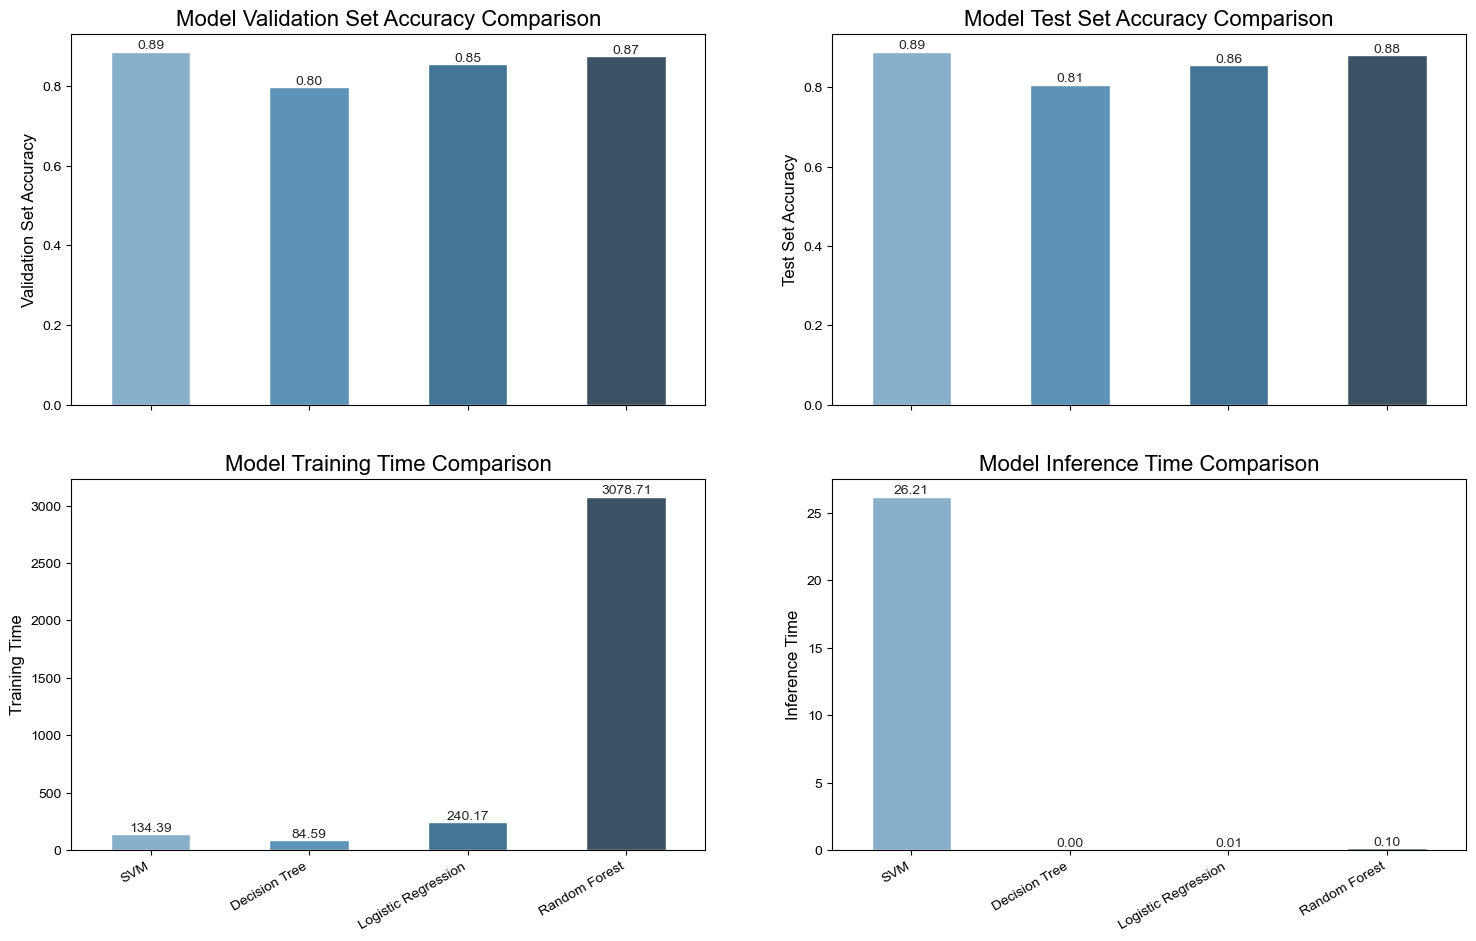

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(18,12))
fig.autofmt_xdate()
plot_model_metric(axes[0,0], models, accuracies, 'Validation Set Accuracy')
plot_model_metric(axes[0,1], models, testset_accur, 'Test Set Accuracy')
plot_model_metric(axes[1,0], models, training_time, 'Training Time')
plot_model_metric(axes[1,1], models, inference_time, 'Inference Time')

### 4.1.9 The Best Classifier

According the best accuracy performace of svm model, svm is the best classifier of our machine learning model.

In [71]:
y_pred = best_svm.predict(X_test1)
print(f"Best Model Accuracy: {accuracy_score(y_test1, y_pred):.4f}")

Best Model Accuracy: 0.8900


### 4.1.10 Loading testing data

Load the testing data for prediction

In [74]:
# test2.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test2_df = pd.read_csv('./data/test2.csv', index_col=0)

In [75]:
# print out the first 5 rows of the test dataframe
data_test2_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,1,0,2,...,0,0,0,0,0
5,0,0,0,0,0,...,0,0,0,0,0


Use the your best classifier to make predictions for the test data. The predictions should be stored in a vector named `output`, with a length of 5000.

In [77]:
# Use your best classifier to make predictions on unseen data. The output of this code must be a vector named 'output' of length 5000
data_test2_df = scaler.fit_transform(data_test2_df)
output = best_svm.predict(data_test2_df)

Save your prediction vector as a `test_output.csv` file, which contains two columns: `id` and `label`. Please refer to the `example_output.csv` for the structure of this output file. 

In [79]:
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./test_output.csv', sep=",", float_format='%d',index_label="id")

## 4.2 Report

The report must be structured into the following key sections:

1. **Introduction**: Provide a comprehensive overview of the dataset, outline the methods chosen, and summarize the key findings and results.
2. **Methodology**: Describe pre-processing techniques and ML algorithms employed in this assignment. Include a discussion of the theoretical principles underlying each method and explain the rationale behind your choices.
3. **Result and Discussion**: Detail the experimental settings (e.g., implementation strategies, hyperparameter finetuning strategies, etc.). Present the results obtained from the selected algorithms and discuss their implications. Compare the performance of all models, considering factors such as accuracy, model complexity, training time, and inference time. Employ high-quality plots, figures, and tables to visually support and enhance the discussion of these results.
4. **Conclusion**: Summarize your main findings, mention any limitations methods and results and suggest potential directions for future works.
5. **References**: include the references cited in your report in a consistent format.

##### Important Notes

- The maximum length of the main report is 8 pages (excluding appendix and references).

-  You must include an appendix that clearly provides the instructions on how to setup the environment to run your code, especialy the installation guide and version of any external packages and
libraries used for implementation. In addition, you should include the hardware configurations used for the coding environment.

- The report must be in PDF format. Make sure the report is well-structured, easy to read, and that it presents your findings in a logical and organized way.


# 5. Submission Guidelines

## 5.1 Group Registration

For this assignment, you can work in groups of TWO. Please register your group under *People → Group → A1.1-Group* or *People → Group → A1.2-Group* on Canvas (We have created two separate group sets to accommodate the large number of students enrolled in this course).  

**The group registration should be done by Friday, Aug 30th, 2024.**

## 5.2 Submit your work

### 5.2.1 Submit to Kaggle

We use the Kaggle leaderboard for evaluating the results predicted by your models on unseen data. Follow the steps below to submit your work to the Kaggle leaderboard.

Kaggle link: [https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/)

1. Use the [Kaggle link](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) to join the competition, you need to create a Kaggle account if you don’t
have one.

2. Go to Team $\rightarrow$ Use your registered Group ID on Canvas as your team name (e.g., `A1.1-Group 1`). You can create a Kaggle team with up to 2 members.
   
3. Go to Description $\rightarrow$ Check the IMPORTANT NOTES for the assignment.
   
4. Submit Predictions $\rightarrow$ Follow the submission format and submit your prediction output file (`test_output.csv`).
   
5. Leaderboard $\rightarrow$ Check your accuracy score at the Leaderboard.

In summary, go to [Kaggle Page](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) $\rightarrow$ Join Competition $\rightarrow$ Create a Team $\rightarrow$ Submit Predictions $\rightarrow$ Submit file `test_output.csv`

IMPORTANT: This link is only available to the students of COMP4318/5318. All groups need to submit `test_output.csv` to Kaggle for marking puporse. Only 5 submissions are allowed per day
for Kaggle. Group ID on Canvas and Kaggle have to be identical otherwise the submission will not be marked for the Accuracy part.



### 5.2.2 Submit to Canvas

#### Proceed to the submission box on Canvas and submit 4 files separately as follows:

   1. A `.pdf` report file.

   2. An `.ipynb` code file: a Jupyter Notebook containing all your implementation. You can reuse the provided `.ipynb` template.
    
   3. A `.pdf` code file: this file is exported from the `.ipynb` file for checking plagiarism. 

   4. A `test_output.csv` file: contains the predictions made by your best classifier on unseen data. This file must be consistent with the one submitted on Kaggle.

There are two different submission boxes for the different group sets: *Assignment 1 - Submission (for A1.1-Group)* and *Assignment 1 - Submission (for A1.2-Group)*. Please ensure you submit to the correct box corresponding to your group ID.

##### File Naming Conventions 

The submission files should be named with your group ID and all student ID (SID) separated by the underscore (_). For example,

- a1_groupID_SID1_SID2.ipynb (code) 
  
- a1_groupID_SID1_SID2.pdf (pdf version of the code)
  
- a1_groupID_SID1_SID2_report.pdf (report)
  
where SID1 and SID2 are the SIDs of the two students.


##### Important Notes:
-	Only one group member needs to submit the assignment on behalf of the group.

-	Do NOT submit the dataset or zip files to Canvas. We will copy the `data` folder to the same directory with your `.ipynb` file to run your code. Please make sure your code is able to read the dataset from this folder.

-	Both the code and report will be checked for plagiarism.

##### Other guidelines

1.	Please refer to lecture notes, lab materials, and other course resources for different ML methods. 

2.	Please proceed your own way if we do not specify it in the assignment details.

3.	You can use any packages or code which have been introduced in lectures or tutorials. If you use any other packages or code snippets, please put the reference at the bottom of the code. Otherwise, it will be considered as plagiarism and the relevant section will not be marked.


## 5.3 Late Submission Penalties

##### A penalty of MINUS 5 percent (-5%) for each day after the due date. 
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas and Kaggle may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues. 

##### All files required for assignment 1 can be downloaded from Canvas $\rightarrow$ Assignments $\rightarrow$ Assignment 1 - Specification


## 5.4 Marking Rubric

Please refer to the rubric, which is available in the submission boxes on Canvas, for detailed marking scheme.

# 6. Inquiries after releasing the marking

**After Assignment 1 marks come out, please submit your inquiries about marking within the 1st week. All inquiries after that will be ignored.**

# 7. Academic honesty

Please read the University policy on Academic Honesty very carefully: 
https://sydney.edu.au/students/academic-integrity.html

Plagiarism (copying from another student, website or other sources), making your work available to another student to copy, engaging another person to complete the assignments instead of you (for payment or not) are all examples of academic dishonesty. Note that when there is copying between students, both students are penalised – the student who copies and the student who makes his/her work available for copying. The University penalties are severe and include: 

    * a permanent record of academic dishonesty on your student file, 
    * mark deduction, ranging from 0 for the assignment to Fail for the course
    * expulsion from the University and cancelling of your student visa. 

In addition, the Australian Government passed a new legislation last year (Prohibiting Academic Cheating Services Bill) that makes it a criminal offence to provide or advertise academic cheating services - the provision or undertaking of work for students which forms a substantial part of a student’s assessment task. Do not confuse legitimate co-operation and cheating!

# 8. References 

1. Arenas, F. (n.d.). SVM-LR-on-Fashion-MNIST. Retrieved Sep 14, 2024, from SVM-LR-on-Fashion-MNIST. https://federicoarenasl.github.io/SVM-LR-on-Fashion-MNIST/   

2. IBM. (2021, August 17). SVM node expert options. https://www.ibm.com/docs/sk/spss-modeler/saas?topic=node-svm-expert-options 

3. scikit-learn. (2024). sklearn.linear_model.LogisticRegression — scikit-learn 0.21.2 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

4. Joleen, B. (2024). Seaborn Heatmaps: A Guide to Data Visualization. https://www.datacamp.com/tutorial/seaborn-heatmaps